# Credit Card Fraud Detection

In [1]:
#Installing packages
!pip install mglearn
!pip install pydotplus
!pip install xgboost
!pip install graphviz

In [2]:
# Importing Packages
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.decomposition import PCA
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from scipy.stats import norm

In [3]:
warnings.filterwarnings("ignore")

In [4]:
os.environ["PATH"] += os.pathsep + 'C:/Users/laksh/Anaconda3/Library/bin/' 

In [5]:
# Changing Directory
os.chdir("A:\Semester 2\Machine Learning\Dataset")

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [7]:
def plot_learning_t_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Test score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [8]:
def graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y,tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [9]:
def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
         roc_auc_score(y,tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [10]:
# Reading Credit Card fraud Detection CSV file
CCFD_data =pd.read_csv('creditcard.csv')

In [11]:
CCFD_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preprocessing Data

In [12]:
# Checking whether dataset is balanced or not
print ('count of 1: {:.0f}' .format(len(CCFD_data[CCFD_data['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(CCFD_data[CCFD_data['Class'] == 0])))

count of 1: 492
count of 0: 284315


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

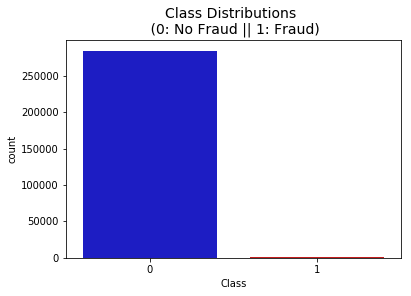

In [13]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=CCFD_data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

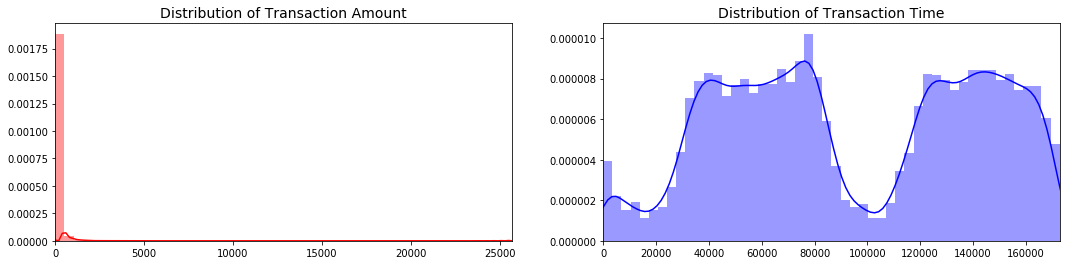

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = CCFD_data['Amount'].values
time_val = CCFD_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [15]:
# Scaling Amount and Time Variable. Other variables are PCA so don't need scaling them.
CCFD_data['scaled_amount'] = RobustScaler().fit_transform(CCFD_data['Amount'].values.reshape(-1,1))
CCFD_data['scaled_time'] = RobustScaler().fit_transform(CCFD_data['Time'].values.reshape(-1,1))
CCFD_data.drop(['Time','Amount'], axis=1, inplace=True)

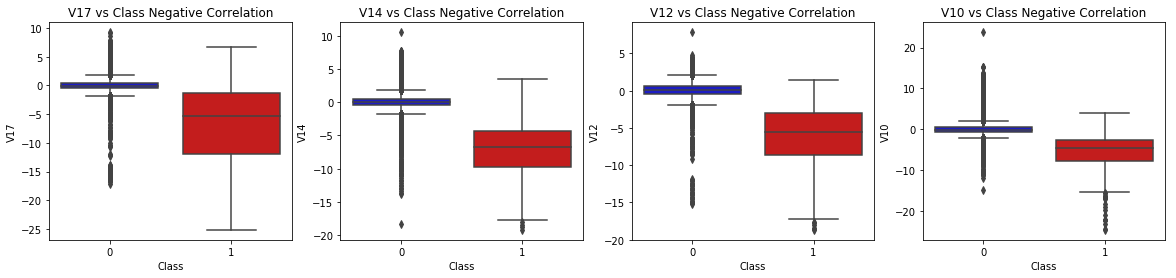

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=CCFD_data, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=CCFD_data, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=CCFD_data, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=CCFD_data, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

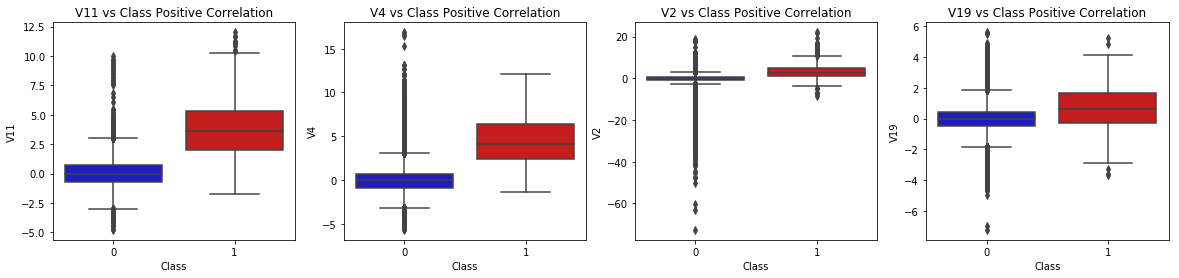

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=CCFD_data, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=CCFD_data, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=CCFD_data, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=CCFD_data, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

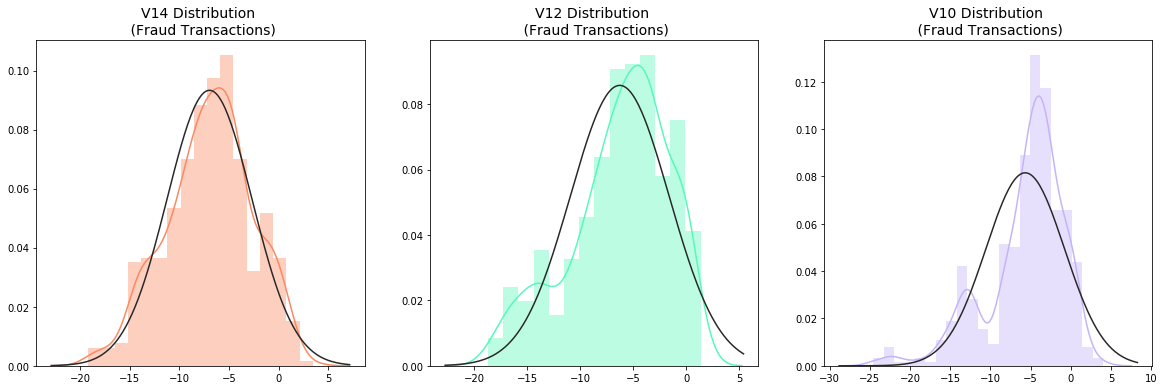

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = CCFD_data['V14'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = CCFD_data['V12'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = CCFD_data['V10'].loc[CCFD_data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [19]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = CCFD_data['V14'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = CCFD_data.drop(CCFD_data[(CCFD_data['V14'] > v14_upper) | (CCFD_data['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = CCFD_data['V12'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = CCFD_data.drop(new_df[(new_df['V12'] > v12_upper) | (CCFD_data['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = CCFD_data['V10'].loc[CCFD_data['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
CCFD_data = CCFD_data.drop(CCFD_data[(CCFD_data['V10'] > v10_upper) | (CCFD_data['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(CCFD_data)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
V12 outliers: [-17.7691434633638, -17.631606313870698, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 6
Number of Instances after outliers removal: 284803
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -15.47046969983434
V10 Upper: 5.0995875

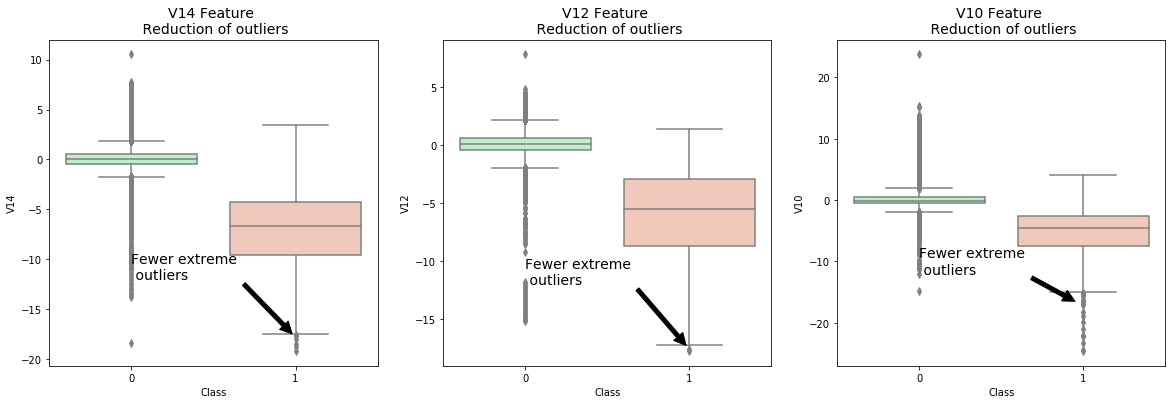

In [20]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [22]:
# Since our Target Variables are highly skewed we should make them equivalent in order to have a normal distribution 
# of the Target Variables.

# Lets shuffle the data before creating the subsamples

df = CCFD_data.sample(frac=1)

# amount of frauds in Class Variable is 492.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
107998,-2.448390,-1.473201,-1.720595,0.335027,0.218372,4.820916,2.948177,0.504284,-0.932025,-0.638790,...,0.213677,1.221718,1.013362,0.465602,-0.270164,0.151924,-0.446299,0,10.736533,-0.164299
95597,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,...,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1,18.615944,-0.226824
95534,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,-0.371672,...,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,1,0.138476,-0.227141
39183,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,-1.965309,...,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,1,10.547474,-0.528237
43681,-18.247513,8.713250,-17.880127,9.249459,-14.541213,-1.911564,-18.014660,5.522162,-9.283925,-14.557159,...,0.615319,-0.486499,0.739268,-0.236845,-0.046082,-3.011473,-1.022147,1,0.446447,-0.506174


Distribution of the Classes in the subsample dataset
0    0.509845
1    0.490155
Name: Class, dtype: float64


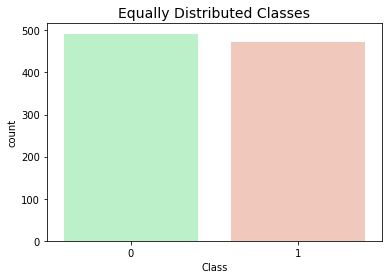

In [23]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

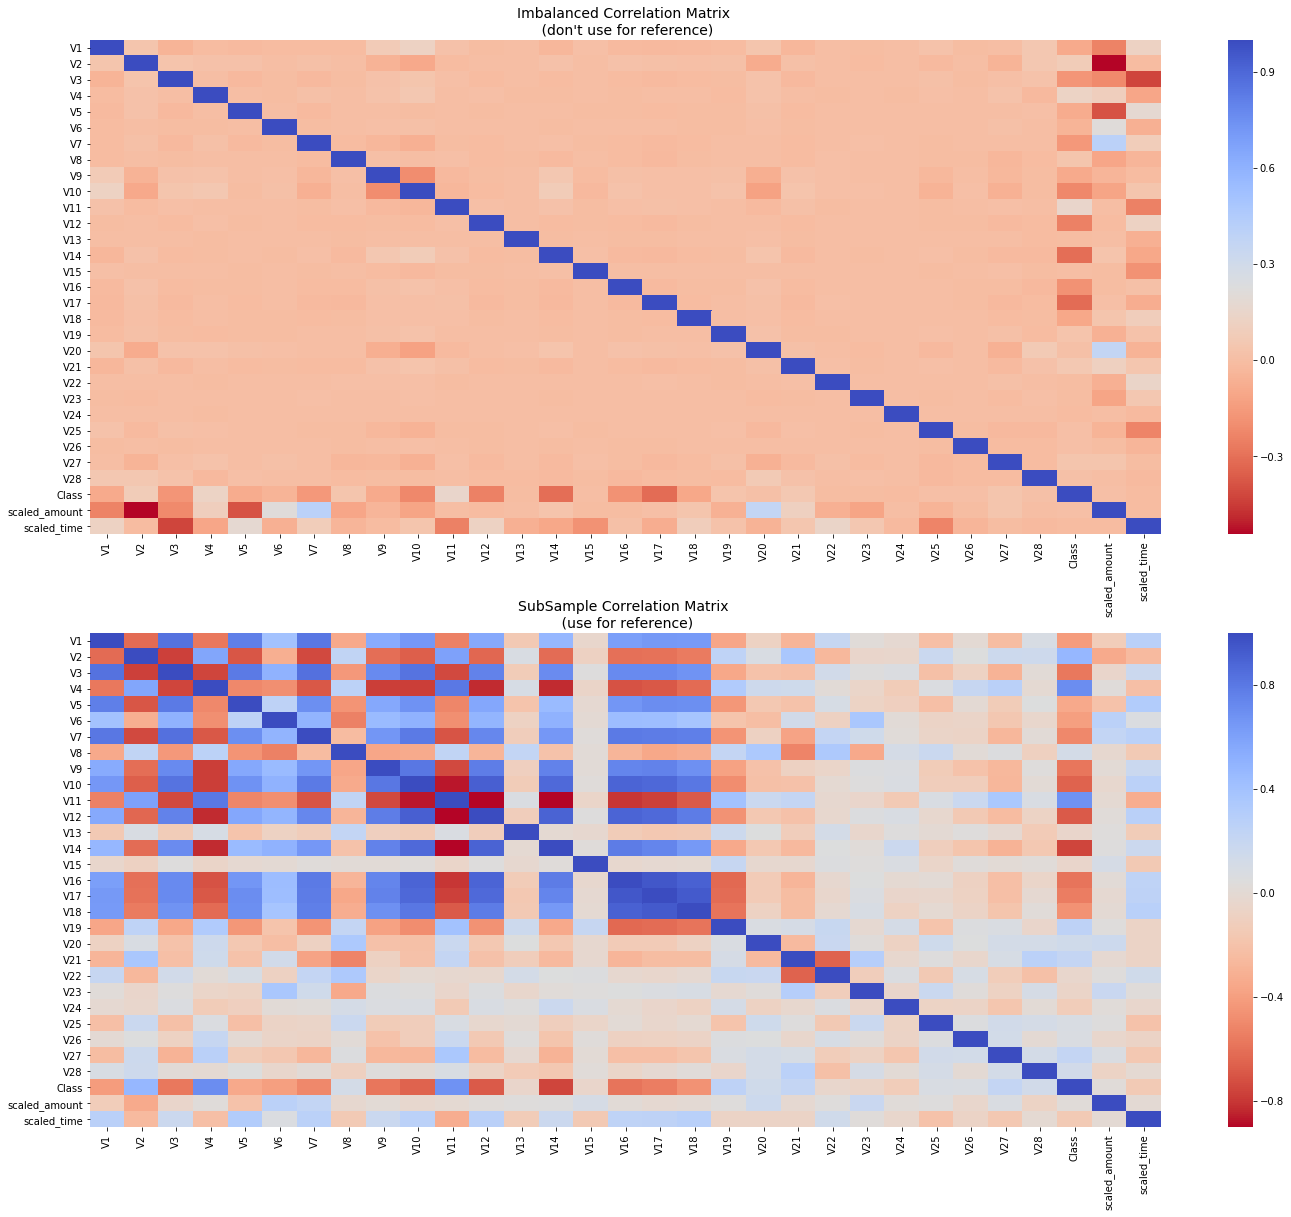

In [24]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# CCFD_data is from the random undersample data (fewer instances)
X = CCFD_data.drop('Class', axis=1)
y = CCFD_data['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


In [17]:
# Splitting the data
train, test = train_test_split(CCFD_data, train_size = 0.7, test_size = 0.3,random_state = 1,shuffle = False)

# Train Data

In [18]:
print('Train')
print ('count of 1: {:.0f}' .format(len(train[train['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(train[train['Class'] == 0])))

Train
count of 1: 351
count of 0: 197779


In [19]:
X_train = train.drop('Class', axis=1)
y_train = train['Class']

# Support Vector Machine

In [ ]:
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm = SVC(kernel='linear', C=0.1, gamma=10).fit(X_train, y_train)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_train, y_train)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_train,y_train)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4


Linear Model took 1.3e+03 s
RBF Model took 2.2e+03 s


In [ ]:
# Predicted Target Values
linear_pred = linear_svm.predict(X_train)
RBF_pred = RBF_svm.predict(X_train)
Poly_pred = Poly_svm.predict(X_train)

In [ ]:
# Confusion Matrix for Linear Model
linear_cm = np.array(confusion_matrix(y_train,linear_pred))
linear_matrix = pd.DataFrame(linear_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
linear_matrix

In [ ]:
# Confusion Matrix for RBF Model
RBF_cm = np.array(confusion_matrix(y_train,RBF_pred))
RBF_matrix = pd.DataFrame(RBF_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
RBF_matrix

In [ ]:
# Confusion Matrix for Polynomial Model
Poly_cm = np.array(confusion_matrix(y_train,Poly_pred))
Poly_matrix = pd.DataFrame(Poly_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Poly_matrix

In [ ]:
# Accuracy of three SVM Models
print("Linear Model accuracy", accuracy_score(y_train,linear_pred))
print("RBF Model accuracy", accuracy_score(y_train,RBF_pred))
print("Polynomial Model accuracy", accuracy_score(y_train,Poly_pred))

In [ ]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# Decision Tree

In [ ]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))


# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred = tree_clf.predict(X_train)
DT_cm = np.array(confusion_matrix(y_train,Decision_Tree_pred))
DT_Conf_matrix = pd.DataFrame(DT_cm,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
DT_Conf_matrix

In [ ]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_train,Decision_Tree_pred)))

In [ ]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

In [ ]:
# Feature Importance
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), rotation=90)

# Show plot

# Boosted Decision Tree

In [ ]:
# Boosted DecisionTree Classifier
XGboost_tree_params = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree = GridSearchCV(XGBClassifier(), XGboost_tree_params).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf = XGboost_grid_tree.best_estimator_

print("XGboost Boosted Decision Tree Accuracy on training set: {:.3f}".format(XGboost_tree_clf.score(X_train, y_train)))

In [ ]:
# Feature Importance
importances = XGboost_tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), rotation=90)

# Show plot

# Test Data

In [ ]:
print('Test')
print ('count of 1: {:.0f}' .format(len(test[test['Class'] == 1])))
print ('count of 0: {:.0f}' .format(len(test[test['Class'] == 0])))

In [ ]:
X_test = test.drop('Class', axis=1)
y_test = test['Class']

# Support Vector Machine

In [ ]:
# Run Logistic Regressions only for train data
# Run Logistic Regressions only for train data
# Run SVM only for train data
t0 = time.time()
linear_svm_test = SVC(kernel='linear', C=0.1, gamma=10).fit(X_test, y_test)
t1 = time.time()
print("Linear Model took {:.2} s".format(t1 - t0))
linear_time = t1 - t0

t2 = time.time()
RBF_svm_test = SVC(kernel='rbf', C=0.1, gamma=10).fit(X_test, y_test)
t3 = time.time()
print("RBF Model took {:.2} s".format(t3 - t2))
RBF_time = t3 - t2

t4 = time.time()
Poly_svm_test = SVC(kernel='poly', C=0.1,degree=3, gamma=10).fit(X_test,y_test)
t5 = time.time()
print("RBF Model took {:.2} s".format(t5 - t4))
Poly_time = t5 - t4

In [ ]:
# Predicted Target Values
linear_pred_test = linear_svm_test.predict(X_test)
RBF_pred_test = RBF_svm_test.predict(X_test)
Poly_pred_test = Poly_svm_test.predict(X_test)

In [ ]:
# Confusion Matrix for Linear Model
linear_cm_test = np.array(confusion_matrix(y_test,linear_pred_test))
linear_matrix_test = pd.DataFrame(linear_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
linear_matrix_test

In [ ]:
# Confusion Matrix for RBF Model
RBF_cm_test = np.array(confusion_matrix(y_test,RBF_pred_test))
RBF_matrix_test = pd.DataFrame(RBF_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
RBF_matrix_test

In [ ]:
# Confusion Matrix for Polynomial Model
Poly_cm_test = np.array(confusion_matrix(y_test,Poly_pred_test))
Poly_matrix_test = pd.DataFrame(Poly_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
Poly_matrix_test

In [ ]:
# Accuracy of three SVM Models
print("Linear Model accuracy", accuracy_score(y_test,linear_pred_test))
print("RBF Model accuracy", accuracy_score(y_test,RBF_pred_test))
print("Polynomial Model accuracy", accuracy_score(y_test,Poly_pred_test))

In [ ]:
svc_params_test = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc_test = GridSearchCV(SVC(), svc_params_test)
grid_svc_test.fit(X_test, y_test)

# SVC best estimator
svc_test = grid_svc.best_estimator_

# Decision Tree

In [ ]:
# DecisionTree Classifier
tree_params_test = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
t2 = time.time()
grid_tree_test = GridSearchCV(DecisionTreeClassifier(), tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
tree_clf_test = grid_tree_test.best_estimator_

In [ ]:
# Confusion Matrix for Decision Tree 
Decision_Tree_pred_test = tree_clf_test.predict(X_test)
DT_cm_test = np.array(confusion_matrix(y_test,Decision_Tree_pred_test))
DT_Conf_matrix_test = pd.DataFrame(DT_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
DT_Conf_matrix_test

In [ ]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,Decision_Tree_pred_test)))

In [ ]:
# Feature Importance
importances = tree_clf_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot

In [ ]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(tree_clf_test, out_file=None, 
                             feature_names=train.columns[:10],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph = graphviz.Source (dot_data)
graph

# Boosted Decision Tree

In [ ]:
# Boosted DecisionTree Classifier
XGboost_tree_params_test = { "max_depth": list(range(2,4,1)),
              "reg_lambda": list(range(5,7,1))}
t2 = time.time()
XGboost_grid_tree_test = GridSearchCV(XGBClassifier(), XGboost_tree_params_test).fit(X, y)
t3 = time.time()
print("Decision Tree Model took {:.2} s".format(t3 - t2))

# tree best estimator
XGboost_tree_clf_test = XGboost_grid_tree_test.best_estimator_

In [ ]:
# Confusion Matrix for Decision Tree 
XGboost_Decision_Tree_pred_test = XGboost_tree_clf_test.predict(X_test)
XGboost_DT_cm_test = np.array(confusion_matrix(y_test,XGboost_Decision_Tree_pred_test))
XGboost_DT_Conf_matrix_test = pd.DataFrame(XGboost_DT_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
                             columns = ['Actual Fraud','Actual No Fraud'])
XGboost_DT_Conf_matrix_test

In [ ]:
print("Decision Tree Accuracy on training set: {:.4f}".format(accuracy_score(y_test,XGboost_Decision_Tree_pred_test)))

In [ ]:
# Feature Importance
importances = XGboost_tree_test.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_test.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_test.shape[1]), rotation=90)

# Show plot

In [ ]:
# Plotting Decision Tree
dot_data_test = StringIO()
tree.export_graphviz(tree_clf_test, out_file=CCFD_dot_data_test, 
                             feature_names=test.columns[:14],  
                             filled=True, rounded=True,  
                             special_characters=True)  
graph_test = pydotplus.graph_from_dot_data(dot_data_test.getvalue())  

Image(graph_test.create_png())
display(thisIsTheImage)

# Learning Curves

# Train Data

In [ ]:
# Overfitting Case

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score = cross_val_score(XGboost_tree_clf, X_train, y_train, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, 'SVM learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(tree_clf,'Decision Tree Learning Curve',  X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(XGboost_tree_clf,'XGboost Decision Tree Learning Curve',  X_train, y_train, (0.87, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc,  X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf,  X_train, y_train, cv=5)

XGboost_tree_pred = cross_val_predict(XGboost_tree_clf,  X_train, y_train, cv=5)

In [ ]:
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y_train, XGboost_tree_pred))

In [ ]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_train, XGboost_tree_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

    
graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Test Data

In [ ]:
# Overfitting Case

svc_score_test = cross_val_score(svc_test, X_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score_test.mean() * 100, 2).astype(str) + '%')

tree_score_test = cross_val_score(tree_clf_test, X_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score_test.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score_test = cross_val_score(XGboost_tree_clf_test, X_test, y_test, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score_test.mean() * 100, 2).astype(str) + '%')

In [ ]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_t_curve(svc_test, 'SVM learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(tree_clf_test,'Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(XGboost_tree_test,'XGboost Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred_test = cross_val_predict(svc_test, X_test, y_test, cv=5,
                             method="decision_function")

tree_pred_test = cross_val_predict(tree_clf_test, X_test, y_test, cv=5)

XGboost_tree_pred_test = cross_val_predict(XGboost_tree_clf_test, X_test, y_test, cv=5)

In [ ]:
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred_test))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred_test))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y_test, XGboost_tree_pred_test))

In [ ]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test, XGboost_tree_pred_test)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred_test)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred_test)

    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Learning Curve

# Train Data

In [ ]:
# Overfitting Case

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score = cross_val_score(XGboost_tree_clf,X_train, y_train, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(svc, 'SVM learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(tree_clf,'Decision Tree Learning Curve', X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(XGboost_tree_clf,'XGboost Decision Tree Learning Curve',X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc,  X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf,  X_train, y_train, cv=5)

XGboost_tree_pred = cross_val_predict(XGboost_tree_clf,  X_train, y_train, cv=5)

In [ ]:
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y_train, XGboost_tree_pred))

In [ ]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_train, XGboost_tree_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

    
graph_roc_curve_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

# Test Data

In [ ]:
# Overfitting Case

svc_score_test = cross_val_score(svc_test, X_test, y_test, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score_test.mean() * 100, 2).astype(str) + '%')

tree_score_test = cross_val_score(tree_clf_test, X_test, y_test, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score_test.mean() * 100, 2).astype(str) + '%')

XGboost_tree_score_test = cross_val_score(XGboost_tree_clf_test, X_test, y_test, cv=5)
print('XGboost_tree_score DecisionTree Classifier Cross Validation Score', \
      round(XGboost_tree_score_test.mean() * 100, 2).astype(str) + '%')

In [ ]:
# Learning Curve
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_t_curve(svc_test, 'SVM learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(tree_clf_test,'Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01), cv=cv, n_jobs=4)
plot_learning_t_curve(XGboost_tree_test,'XGboost Decision Tree Learning Curve', X_test, y_test, (0.87, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
# Create a DataFrame with all the scores and the classifiers names.

svc_pred_test = cross_val_predict(svc_test, X_test, y_test, cv=5,
                             method="decision_function")

tree_pred_test = cross_val_predict(tree_clf_test, X_test, y_test, cv=5)

XGboost_tree_pred_test = cross_val_predict(XGboost_tree_clf_test, X_test, y_test, cv=5)

In [ ]:
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred_test))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred_test))
print('XGboost Decision Tree Classifier: ', roc_auc_score(y_test, XGboost_tree_pred_test))

In [ ]:
# Plotting ROC Curve
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test, XGboost_tree_pred_test)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred_test)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred_test)

    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
# Kernel Learning Curve
k = ["Linear Kernel","RBF Kernel","Polynomial Kernel"]
Train_error = [accuracy_score(y,linear_pred),accuracy_score(y,RBF_pred),
               accuracy_score(y,Poly_pred)]
Test_error = [accuracy_score(y_test,linear_pred_test),accuracy_score(y_test,RBF_pred_test),
               accuracy_score(y_test,Poly_pred_test)]
plt.plot(k,Train_error,marker = '',color='red',linewidth=4,label='Train Error')
plt.plot(k,Test_error,marker = '',color='blue',linewidth=4,label='Train Error')
plt.title("Test/Train Error vs kernels")
plt.legend()